# ANN using Numpy

In [1]:
import numpy as np

In [23]:
x = np.array([[1,1],[0,1],[1,0],[0,0]])
y = np.array([[0],[1],[1],[0]])

num_inputs = 2
num_hidden = 3
num_output = 1

In [26]:
# random values for w_xh, b_h
w_xh = np.random.randn(num_inputs, num_hidden) 
b_h = np.zeros((1, num_hidden))
w_xh

array([[ 0.54613308, -0.24569178,  2.118803  ],
       [ 0.95291215, -0.41981873, -0.55253659]])

In [27]:
b_h

array([[0., 0., 0.]])

In [29]:
# random values for w_hy, b_y

w_hy = np.random.randn(num_hidden, num_output) 
b_y = np.zeros((1, num_output))
w_hy, b_y

(array([[-0.39327199],
        [-0.12002334],
        [ 0.60166132]]),
 array([[0.]]))

In [14]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [15]:
def forward_prop(x, w_xh, w_hy, b_h, b_y):
    z1 = np.dot(x, w_xh) + b_h
    a1 = sigmoid(z1)
    z2 = np.dot(a1, w_hy) + b_y
    y_hat = sigmoid(z2)
    return z1, a1, z2, y_hat

### here we shall try to solve the problem of XOR gate

#### XOR - eXclusive OR gate

|X1|X2|output|
|--|--|------|
|T|T|F|
|F|T|T|
|T|F|T|
|F|F|F|

#### if we use just one perceptron to perform an OR gate operation it performs fine but a single perceptron cannot perform XOR gate because the data for the perceptron is not gonna be linearly separable 

In [16]:
def cost_function(y,y_hat):
    return sum((y-y_hat)**2)/len(y)

### Backpropagation

In [18]:
def sigmoid_derivative(x):
    return np.exp(-x)/((1+np.exp(-x))**2)

# def sigmoid_derivative(x):
#     return sigmoid(x)(1-sigmoid(x))

In [19]:
def backward_prop(z1,a1,z2,y_hat):
    delta2 = np.multiply(-(y-y_hat), sigmoid_derivative(z2))
    dL_dw_hy = np.dot(a1.T, delta2)
    delta1 = np.dot(delta2, w_hy.T)*sigmoid_derivative(z1)
    dL_dw_xh = np.dot(x.T, delta1)
    return dL_dw_hy, dL_dw_xh

In [21]:
alpha = 0.01
num_iterations = 100000

In [30]:
cost = []
for i in range(num_iterations):
    z1, a1, z2, y_hat = forward_prop(x, w_xh, w_hy, b_h, b_y)
    dL_dw_hy, dL_dw_xh = backward_prop(z1,a1,z2,y_hat)
    
    #update the weights
    w_xh = w_xh - alpha * dL_dw_xh
    w_hy = w_hy - alpha * dL_dw_hy
    
    #compute cost
    c = cost_function(y, y_hat)
    cost.append(c)

Text(0, 0.5, 'Cost')

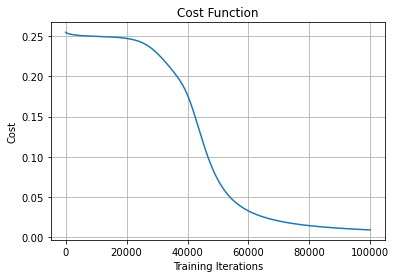

In [32]:
import matplotlib.pyplot as plt

plt.grid()
plt.plot(range(num_iterations),cost)
plt.title('Cost Function')
plt.xlabel('Training Iterations')
plt.ylabel('Cost')